In [37]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50, resnet50
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import Input
import numpy as np

BS=16
datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = datagenerator.flow_from_directory('./Flowers/Train',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          batch_size=BS,
                                          shuffle='true',
                                          color_mode='rgb')

test_generator = datagenerator.flow_from_directory('./Flowers/Test',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          color_mode='rgb'
                                          )

# res_model = ResNet50(include_top=False, weights="imagenet", input_shape=(128, 128, 3))

# # Make sure the base model's layers are not trainable to not add complexity from there
# for layer in res_model.layers:
#     layer.trainable = False

# model = Sequential()
# model.add(res_model)
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(Flatten())
# model.add(Dense(len(train_generator.class_indices), activation="softmax"))

model = Sequential()
# model.add(res_model)  # Base model

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))  # Increased dropout

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
# model.add(Dropout(0.5))  # Additional dropout layer
model.add(Dense(len(train_generator.class_indices), activation='softmax'))


model.summary()

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)


Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_755 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_756 (Conv2D)         (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 32, 32, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_757 (Conv2D)         (None, 32, 32, 128)       73856     
                                   

In [38]:
import matplotlib.pyplot as plt

def plot_results(H):
    print(H.history.keys())
    #  "Accuracy"
    plt.plot(H.history['accuracy'])
    plt.plot(H.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(H.history['loss'])
    plt.plot(H.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Epoch 1/100
38/38 [==============================] - 3s 66ms/step - loss: 0.3591 - accuracy: 0.3783 - val_loss: 0.2535 - val_accuracy: 0.5600
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.1160 - accuracy: 0.8283 - val_loss: 0.2111 - val_accuracy: 0.5800
Epoch 3/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0527 - accuracy: 0.9350 - val_loss: 0.1784 - val_accuracy: 0.6700
Epoch 4/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0282 - accuracy: 0.9750 - val_loss: 0.1642 - val_accuracy: 0.6750
Epoch 5/100
38/38 [==============================] - 2s 65ms/step - loss: 0.0158 - accuracy: 0.9967 - val_loss: 0.1587 - val_accuracy: 0.6500
Epoch 6/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.6800
Epoch 7/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.1432 - val_accuracy: 0.6900
Epoch 

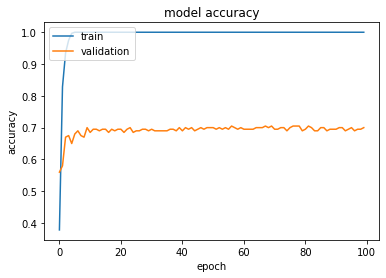

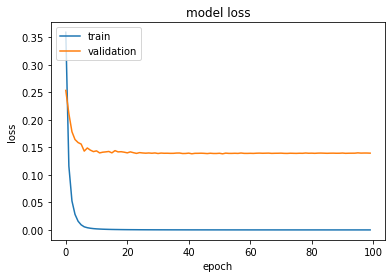

In [39]:
# Transfer learning VGG

from keras.applications import VGG16, ResNet50, ResNet101, InceptionV3, DenseNet121
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import math
     


vgg_base = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 6s 83ms/step - loss: 0.4743 - accuracy: 0.1400 - val_loss: 0.4414 - val_accuracy: 0.1850
Epoch 2/100
38/38 [==============================] - 2s 61ms/step - loss: 0.4290 - accuracy: 0.2350 - val_loss: 0.4387 - val_accuracy: 0.2000
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.4063 - accuracy: 0.2217 - val_loss: 0.4193 - val_accuracy: 0.1850
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.3925 - accuracy: 0.2517 - val_loss: 0.4011 - val_accuracy: 0.2550
Epoch 5/100
38/38 [==============================] - 2s 49ms/step - loss: 0.3629 - accuracy: 0.3417 - val_loss: 0.4102 - val_accuracy: 0.2700
Epoch 6/100
38/38 [==============================] - 2s 58ms/step - loss: 0.3617 - accuracy: 0.3350 - val_loss: 0.3977 - val_accuracy: 0.2450
Epoch 7/100
38/38 [==============================] - 2s 62ms/step - loss: 0.3429 - accuracy: 0.3817 - val_loss: 0.3774 - val_accuracy: 0.3800
Epoch 

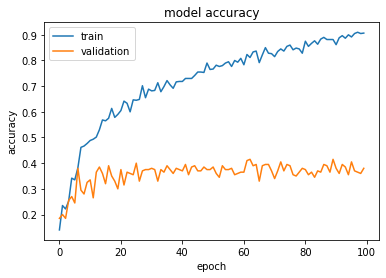

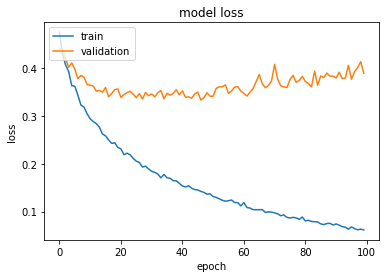

In [40]:
# Transfer learning ResNet50
from keras.applications import ResNet50, ResNet101, InceptionV3, DenseNet121
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import math

vgg_base = ResNet50(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 8s 103ms/step - loss: 0.4657 - accuracy: 0.1317 - val_loss: 0.4383 - val_accuracy: 0.1700
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 0.4210 - accuracy: 0.2350 - val_loss: 0.4129 - val_accuracy: 0.1550
Epoch 3/100
38/38 [==============================] - 2s 51ms/step - loss: 0.3920 - accuracy: 0.2950 - val_loss: 0.4031 - val_accuracy: 0.2400
Epoch 4/100
38/38 [==============================] - 2s 54ms/step - loss: 0.3693 - accuracy: 0.3500 - val_loss: 0.3851 - val_accuracy: 0.3450
Epoch 5/100
38/38 [==============================] - 2s 62ms/step - loss: 0.3407 - accuracy: 0.4050 - val_loss: 0.3769 - val_accuracy: 0.3200
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 0.3284 - accuracy: 0.3867 - val_loss: 0.3772 - val_accuracy: 0.2750
Epoch 7/100
38/38 [==============================] - 2s 58ms/step - loss: 0.3140 - accuracy: 0.4217 - val_loss: 0.3621 - val_accuracy: 0.3350
Epoch

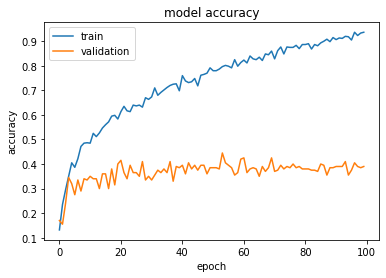

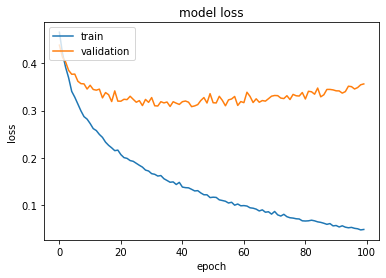

In [41]:
# Transfer learning ResNet101
from keras.applications import ResNet101, InceptionV3, DenseNet121
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import math

vgg_base = ResNet101(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 7s 94ms/step - loss: 0.3475 - accuracy: 0.5233 - val_loss: 0.2151 - val_accuracy: 0.5800
Epoch 2/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0362 - accuracy: 0.9283 - val_loss: 0.1600 - val_accuracy: 0.7050
Epoch 3/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0092 - accuracy: 0.9650 - val_loss: 0.1641 - val_accuracy: 0.6800
Epoch 4/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0028 - accuracy: 0.9983 - val_loss: 0.1621 - val_accuracy: 0.6950
Epoch 5/100
38/38 [==============================] - 3s 66ms/step - loss: 8.6086e-04 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.7000
Epoch 6/100
38/38 [==============================] - 2s 65ms/step - loss: 5.1476e-04 - accuracy: 1.0000 - val_loss: 0.1573 - val_accuracy: 0.7000
Epoch 7/100
38/38 [==============================] - 2s 62ms/step - loss: 3.7493e-04 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0

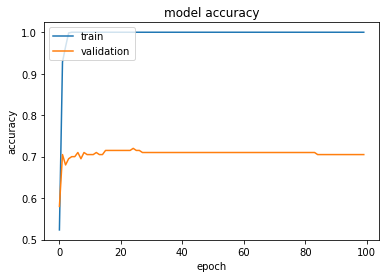

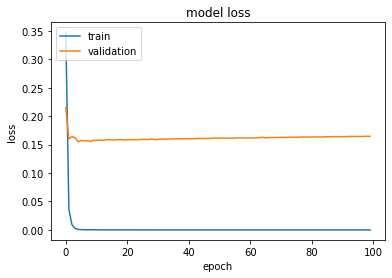

In [42]:
# Transfer learning InceptionV3
from keras.applications import InceptionV3, DenseNet121
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import math

vgg_base = InceptionV3(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 8s 99ms/step - loss: 0.2166 - accuracy: 0.6600 - val_loss: 0.1838 - val_accuracy: 0.6900
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0117 - accuracy: 0.9683 - val_loss: 0.1341 - val_accuracy: 0.7650
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0012 - accuracy: 0.9983 - val_loss: 0.1166 - val_accuracy: 0.7900
Epoch 4/100
38/38 [==============================] - 3s 66ms/step - loss: 3.8286e-04 - accuracy: 1.0000 - val_loss: 0.1170 - val_accuracy: 0.7850
Epoch 5/100
38/38 [==============================] - 2s 63ms/step - loss: 2.2859e-04 - accuracy: 1.0000 - val_loss: 0.1160 - val_accuracy: 0.7900
Epoch 6/100
38/38 [==============================] - 2s 63ms/step - loss: 1.7423e-04 - accuracy: 1.0000 - val_loss: 0.1161 - val_accuracy: 0.7900
Epoch 7/100
38/38 [==============================] - 2s 62ms/step - loss: 1.3810e-04 - accuracy: 1.0000 - val_loss: 0.1157 - val_accurac

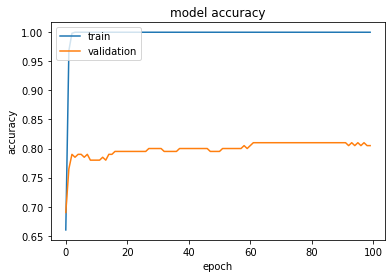

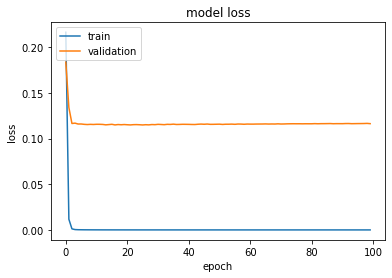

In [43]:
# Transfer learning DenseNet121
from keras.applications import DenseNet121
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import math

vgg_base = DenseNet121(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation = "softmax"))


opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 8s 99ms/step - loss: 0.4212 - accuracy: 0.4517 - val_loss: 0.1607 - val_accuracy: 0.6900
Epoch 2/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0859 - accuracy: 0.7883 - val_loss: 0.1333 - val_accuracy: 0.6950
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0465 - accuracy: 0.8783 - val_loss: 0.1253 - val_accuracy: 0.7500
Epoch 4/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0243 - accuracy: 0.9233 - val_loss: 0.1308 - val_accuracy: 0.7450
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0134 - accuracy: 0.9533 - val_loss: 0.1089 - val_accuracy: 0.7600
Epoch 6/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0104 - accuracy: 0.9633 - val_loss: 0.1089 - val_accuracy: 0.7750
Epoch 7/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0095 - accuracy: 0.9733 - val_loss: 0.1276 - val_accuracy: 0.7700
Epoch 

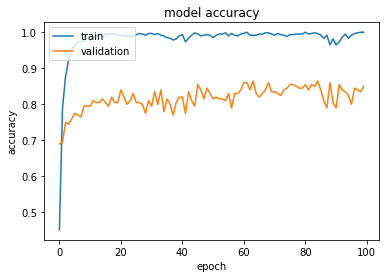

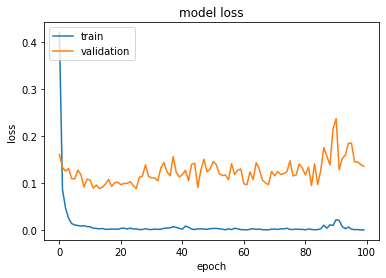

In [46]:
# Add Dropout

vgg_base = DenseNet121(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)

model.add(Flatten())
model.add(Dense(256, activation="relu"))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 8s 106ms/step - loss: 41.5386 - accuracy: 0.4367 - val_loss: 32.8637 - val_accuracy: 0.7300
Epoch 2/100
38/38 [==============================] - 3s 68ms/step - loss: 26.6777 - accuracy: 0.8000 - val_loss: 21.2669 - val_accuracy: 0.7600
Epoch 3/100
38/38 [==============================] - 2s 58ms/step - loss: 17.3574 - accuracy: 0.9033 - val_loss: 13.9033 - val_accuracy: 0.8200
Epoch 4/100
38/38 [==============================] - 3s 71ms/step - loss: 11.4088 - accuracy: 0.9083 - val_loss: 9.3123 - val_accuracy: 0.8200
Epoch 5/100
38/38 [==============================] - 2s 64ms/step - loss: 7.7149 - accuracy: 0.9133 - val_loss: 6.4294 - val_accuracy: 0.7700
Epoch 6/100
38/38 [==============================] - 2s 64ms/step - loss: 5.3685 - accuracy: 0.9567 - val_loss: 4.5509 - val_accuracy: 0.8000
Epoch 7/100
38/38 [==============================] - 3s 67ms/step - loss: 3.8453 - accuracy: 0.9450 - val_loss: 3.3105 - val_accuracy: 0.825

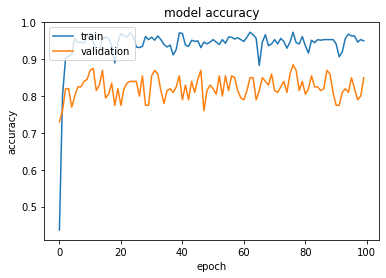

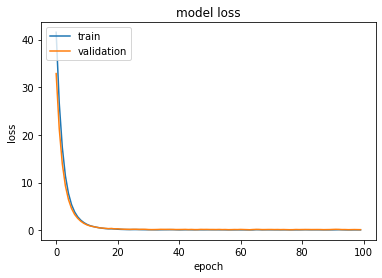

In [48]:
# Add Regularization

vgg_base = DenseNet121(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Found 600 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Epoch 1/100
38/38 [==============================] - 11s 164ms/step - loss: 41.0797 - accuracy: 0.5517 - val_loss: 31.9774 - val_accuracy: 0.6450
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 25.4664 - accuracy: 0.8267 - val_loss: 19.6923 - val_accuracy: 0.7600
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 15.6244 - accuracy: 0.8483 - val_loss: 12.1908 - val_accuracy: 0.6950
Epoch 4/100
38/38 [==============================] - 5s 142ms/step - loss: 9.6749 - accuracy: 0.8867 - val_loss: 7.6585 - val_accuracy: 0.7450
Epoch 5/100
38/38 [==============================] - 5s 129ms/step - loss: 6.1627 - accuracy: 0.8917 - val_loss: 4.9881 - val_accuracy: 0.7000
Epoch 6/100
38/38 [==============================] - 5s 127ms/step - loss: 4.0295 - accuracy: 0.9050 - val_loss: 3.3195 - val_accuracy: 0.7250
Epoch 7/100
38/38 [==============================] 

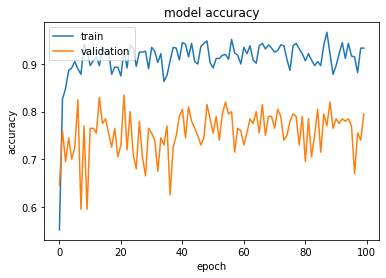

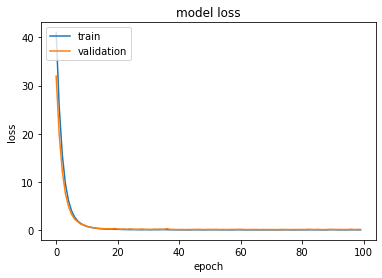

In [50]:
# Data Augmentation

datagenerator = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = datagenerator.flow_from_directory('./Flowers/Train',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          batch_size=BS,
                                          shuffle='true',
                                          color_mode='rgb')


test_generator = datagenerator.flow_from_directory('./Flowers/Test',
                                          target_size=(128, 128),
                                          class_mode='categorical',
                                          color_mode='rgb'
                                          )

vgg_base = DenseNet121(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
#model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS)

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 11s 174ms/step - loss: 14.4017 - accuracy: 0.1633 - val_loss: 4.2789 - val_accuracy: 0.2150 - lr: 0.0010
Epoch 2/100
38/38 [==============================] - 5s 130ms/step - loss: 2.4943 - accuracy: 0.4317 - val_loss: 1.8448 - val_accuracy: 0.5650 - lr: 0.0010
Epoch 3/100
38/38 [==============================] - 5s 141ms/step - loss: 1.5648 - accuracy: 0.7017 - val_loss: 1.4849 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 4/100
38/38 [==============================] - 4s 111ms/step - loss: 1.1392 - accuracy: 0.7117 - val_loss: 1.1210 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 1.0712 - accuracy: 0.7117 - val_loss: 1.2096 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 6/100
38/38 [==============================] - 5s 135ms/step - loss: 0.8113 - accuracy: 0.7633 - val_loss: 0.8192 - val_accuracy: 0.6450 - lr: 0.0010
Epoch 7/100
38/38 [==============================] - 5s 136ms/

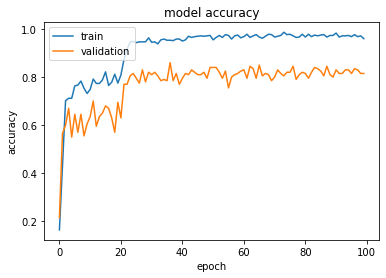

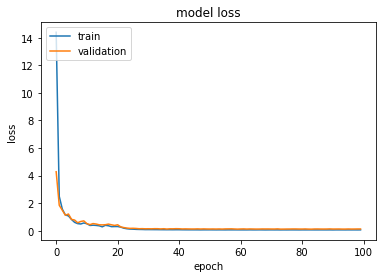

In [51]:

# Learning Rate Scheduler

from keras.callbacks import LearningRateScheduler

vgg_base = DenseNet121(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
#model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


def lr_scheduler(epoch):
    lr=1e-3
    if epoch > 80:
        lr *= 0.5e-3
    elif epoch > 60:
        lr *= 1e-3
    elif epoch > 40:
        lr *= 1e-2
    elif epoch > 20:
        lr *= 1e-1
    
    return lr #1.0000e-05


lr_schedul = LearningRateScheduler(lr_scheduler)

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS, callbacks=[lr_schedul])

#plot
plot_results(H)

Epoch 1/100
38/38 [==============================] - 10s 153ms/step - loss: 49.9632 - accuracy: 0.2133 - val_loss: 48.7510 - val_accuracy: 0.3050 - lr: 1.0000e-05
Epoch 2/100
38/38 [==============================] - 5s 128ms/step - loss: 47.6429 - accuracy: 0.4417 - val_loss: 46.6231 - val_accuracy: 0.4350 - lr: 1.0000e-05
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 45.5478 - accuracy: 0.5833 - val_loss: 44.6451 - val_accuracy: 0.4650 - lr: 1.0000e-05
Epoch 4/100
38/38 [==============================] - 5s 122ms/step - loss: 43.5528 - accuracy: 0.6900 - val_loss: 42.6923 - val_accuracy: 0.5250 - lr: 1.0000e-05
Epoch 5/100
38/38 [==============================] - 5s 129ms/step - loss: 41.6818 - accuracy: 0.7033 - val_loss: 40.8539 - val_accuracy: 0.5550 - lr: 1.0000e-05
Epoch 6/100
38/38 [==============================] - 5s 125ms/step - loss: 39.8368 - accuracy: 0.7767 - val_loss: 39.0283 - val_accuracy: 0.5700 - lr: 1.0000e-05
Epoch 7/100
38/38 [========

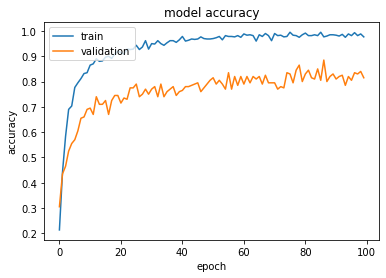

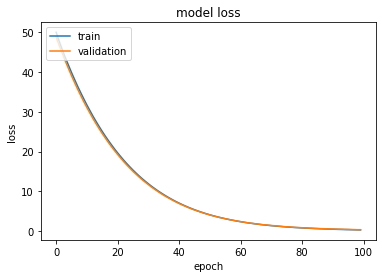

In [53]:
# With best learning rate found during the last step

# Learning Rate Scheduler

from keras.callbacks import LearningRateScheduler

vgg_base = DenseNet121(weights="imagenet", include_top=False, input_shape=(128,128,3))

for layer in vgg_base.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg_base)

model.add(Flatten())
model.add(Dense(256, activation="relu", kernel_regularizer=regularizers.L2(0.1)))
#model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


def lr_scheduler(epoch):
    # lr=1e-3
    # if epoch > 80:
    #     lr *= 0.5e-3
    # elif epoch > 60:
    #     lr *= 1e-3
    # elif epoch > 40:
    #     lr *= 1e-2
    # elif epoch > 20:
    #     lr *= 1e-1
    
    return 1.0000e-05


lr_schedul = LearningRateScheduler(lr_scheduler)

opt = Adam(learning_rate=1e-4)
EPOCHS=100
model.compile(loss="categorical_focal_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(train_generator, validation_data = test_generator, epochs=EPOCHS, callbacks=[lr_schedul])

#plot
plot_results(H)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


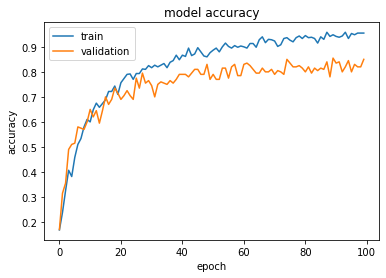

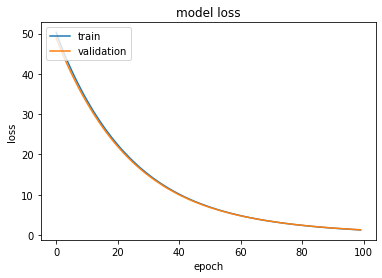

In [32]:
import matplotlib.pyplot as plt

print(H.history.keys())
#  "Accuracy"
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()